# Mallet

## 1. Preprocessing

#### Loading modules from DARIAH-Topics library
First, we have to get access to the functionalities of the library by importing them. For using its functions we use the prefix of the toolbox's submodules (pre, visual and mallet).

In [1]:
from dariah_topics import preprocessing as pre
from dariah_topics import visualization as visual
from dariah_topics import mallet as mal

#### Activating inline output in Jupyter notebook
The following line will just tell the notebook to show graphics in the output frames.

In [2]:
%matplotlib inline

/usr/local/lib/python3.4/dist-packages/traitlets/traitlets.py:809: DeprecationWarning: A parent of InlineBackend._config_changed has adopted the new (traitlets 4.1) @observe(change) API
  clsname, change_or_name), DeprecationWarning)
/usr/lib/python3.4/importlib/_bootstrap.py:321: DeprecationWarning: `IPython.lib.inputhook` is deprecated since IPython 5.0 and will be removed in future versions.
  return f(*args, **kwds)
/usr/local/lib/python3.4/dist-packages/IPython/lib/inputhook.py:327: DeprecationWarning: `register` is deprecated since IPython 5.0 and will be removed in future versions.
  @inputhook_manager.register('osx')
/usr/local/lib/python3.4/dist-packages/IPython/lib/inputhook.py:336: DeprecationWarning: `register` is deprecated since IPython 5.0 and will be removed in future versions.
  @inputhook_manager.register('wx')
/usr/local/lib/python3.4/dist-packages/IPython/lib/inputhook.py:398: DeprecationWarning: `register` is deprecated since IPython 5.0 and will be removed in futu

### Reading a corpus of documents

In [3]:
path_to_corpus = "corpus_txt"

In [4]:
doclist = pre.create_document_list(path_to_corpus)
doc_labels = list(pre.get_labels(doclist))
corpus = pre.read_from_txt(doclist)
doc_tokens = [list(pre.tokenize(doc)) for doc in list(corpus)]
id_types, doc_ids = pre.create_dictionaries(doc_labels, doc_tokens)
sparse_bow = pre.create_mm(doc_labels, doc_tokens, id_types, doc_ids)

### Feature removal

In [10]:
mfw100 = pre.find_stopwords(sparse_bow, id_types, 100)
hapax_list = pre.find_hapax(sparse_bow, id_types)
stoplist = set(mfw100).union(hapax_list)
#stoplist = ', '.join(stoplist)

## 2. Model creation

In [13]:
path_to_mallet = "/home/steffen/Software/mallet/bin/mallet"

In [14]:
outfolder = "tutorial_supplementals/mallet_output"

In [30]:
mallet_model = mal.create_mallet_model(path_to_mallet = path_to_mallet, 
                                       outfolder = outfolder,
                                       path_to_corpus = path_to_corpus,
                                       remove_stopwords = "True", 
                                       stoplist = stoplist
                                      )

['/home/steffen/Software/mallet/bin/mallet', 'import-dir', '--input', 'corpus_txt', '--output', 'tutorial_supplementals/mallet_output/malletModel.mallet', '--keep-sequence', '--stoplist-file', 'inconvenience, aqua, dirty-looking, bat-bat, appeased, trusting, dapper, bewilders, copies, exhume, excuses, quiteyou, cooks, slow-worm, dry-leaved, troublesome, timing, rationale, negligently, ledgewise, hedgehog, decomposition, roughened, necromancers, cesspool, extinguish, babes, pad-chains, which-should, oppress, regan\'s, lamed, spanish-american, seller, nephews, slow-swinging, nuisance, controversy, snuffed, differs, valued, six-foot, stick-legs, showman, outlawed, trash-like, fairer, dawdling, firmly-pronounced, bedclothes, eaves-dropping, cholera-stricken, one-dash, driftwood, preparatory, sternenschicht, bludgeoning, grating, skiffs, washerwomanish, pascal, wedlock, cornelians, idiomatic, despised, maniac\'s, implicit, resisting, greathed, mendelssohn\'s, buddhism, institutions, impecca

In [31]:
output_folder = mal.create_mallet_output(path_to_mallet = path_to_mallet, 
                                         path_to_malletModel = mallet_model, 
                                         outfolder = outfolder
                                        )

In [32]:
doc_topic = mal.show_docTopicMatrix(output_folder, "doc_topics.txt")

## 3. Visualization

In [35]:
mal.show_topics_keys(output_folder, topicsKeyFile = "topic_keys.txt")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,the,and,they,little,all,with,mowgli,said,them,when,jungle,big,time,bagheera,head,would,very,their,two,like
1,his,was,you,for,that,him,had,said,not,there,out,are,were,then,will,have,who,could,down,one
2,which,sir,upon,have,that,very,holmes,was,not,been,our,should,her,had,moor,this,watson,henry,has,could
3,the,which,that,not,have,this,for,its,are,been,all,our,now,more,but,will,these,one,their,from
4,the,and,his,her,she,with,was,conan,him,from,they,but,not,into,their,them,like,were,through,door
5,which,was,you,his,had,upon,her,them,holmes,with,they,little,she,two,there,however,time,have,small,hand
6,was,had,which,its,there,seemed,only,did,whose,above,time,walls,house,thought,seen,down,most,stone,floor,after
7,and,said,ravager,was,not,which,with,all,smallest,were,she,like,dog,but,her,moore,slippers,they,went,did
8,had,our,were,not,their,was,been,could,for,more,those,though,over,ones,feet,old,lake,camp,land,them
9,the,and,that,with,from,this,all,but,have,would,some,when,about,one,what,than,other,they,must,might


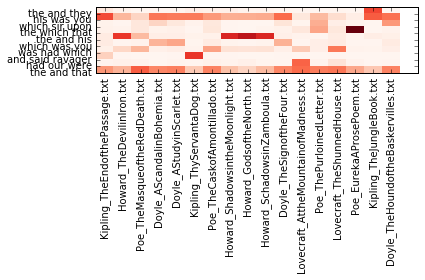

In [33]:
heatmap = visual.doc_topic_heatmap(doc_topic)
heatmap.show()

In [ ]:
visual.plot_doc_topics(doc_topic, 6)

In [ ]:
a = doc_topic.transpose()
a

In [ ]:
doc_topic